In [2]:
!pip install scanpy
!pip install anndata
!pip3 install igraph
!pip install celltypist
!pip install decoupler
!pip install fa2-modified
!pip install louvain
!pip install scvelo
!pip install pertpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.2/174.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 87.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 67.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 65.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [3]:
import scanpy as sc
import anndata as ad
import numpy as np
import pertpy as pt

In [4]:
!wget https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSM2560249_2.2.mtx.gz
!wget https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSM2560249_barcodes.tsv.gz
!wget https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSE96583_batch2.genes.tsv.gz

--2026-01-02 08:02:19--  https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSM2560249_2.2.mtx.gz
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/josoga2/sc/refs/heads/main/GSE96583_RAW/GSM2560249_2.2.mtx.gz [following]
--2026-01-02 08:02:19--  https://raw.githubusercontent.com/josoga2/sc/refs/heads/main/GSE96583_RAW/GSM2560249_2.2.mtx.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29050932 (28M) [application/octet-stream]
Saving to: ‘GSM2560249_2.2.mtx.gz’

GSM2560249_2.2.mtx. 100%[===================>]  27.71M  --.-KB/s    in 0.1s    

2026-01-02 08:02:20 (252 MB/s) - ‘GSM25602

In [5]:
!mkdir -p GSM2560245_Before


Without IFN

In [6]:
!mv GSM2560249_2.2.mtx.gz /content/GSM2560245_Before
!mv GSM2560249_barcodes.tsv.gz /content/GSM2560245_Before
!mv GSE96583_batch2.genes.tsv.gz /content/GSM2560245_Before

#rename the moved files
!mv /content/GSM2560245_Before/GSM2560249_2.2.mtx.gz  /content/GSM2560245_Before/matrix.mtx.gz
!mv /content/GSM2560245_Before/GSM2560249_barcodes.tsv.gz /content/GSM2560245_Before/barcodes.tsv.gz
!mv /content/GSM2560245_Before/GSE96583_batch2.genes.tsv.gz /content/GSM2560245_Before/genes.tsv.gz

IFN treated cells


In [7]:
!wget https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSM2560248_2.1.mtx.gz
!wget https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSM2560248_barcodes.tsv.gz
!wget https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSE96583_batch2.genes.tsv.gz

--2026-01-02 08:02:55--  https://github.com/josoga2/sc/raw/refs/heads/main/GSE96583_RAW/GSM2560248_2.1.mtx.gz
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/josoga2/sc/refs/heads/main/GSE96583_RAW/GSM2560248_2.1.mtx.gz [following]
--2026-01-02 08:02:55--  https://raw.githubusercontent.com/josoga2/sc/refs/heads/main/GSE96583_RAW/GSM2560248_2.1.mtx.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28545918 (27M) [application/octet-stream]
Saving to: ‘GSM2560248_2.1.mtx.gz’

GSM2560248_2.1.mtx. 100%[===================>]  27.22M  --.-KB/s    in 0.1s    

2026-01-02 08:02:56 (230 MB/s) - ‘GSM25602

In [8]:
!mkdir -p GSM246025_After

In [9]:
!mv GSM2560248_2.1.mtx.gz /content/GSM246025_After
!mv GSM2560248_barcodes.tsv.gz /content/GSM246025_After
!mv GSE96583_batch2.genes.tsv.gz /content/GSM246025_After



In [10]:
#rename the files
!mv /content/GSM246025_After/GSM2560248_2.1.mtx.gz  /content/GSM246025_After/matrix.mtx.gz
!mv /content/GSM246025_After/GSM2560248_barcodes.tsv.gz /content/GSM246025_After/barcodes.tsv.gz
!mv /content/GSM246025_After/GSE96583_batch2.genes.tsv.gz /content/GSM246025_After/genes.tsv.gz

Assemble the dataset

In [11]:
import pandas as pd
import scanpy as sc

def load_dataset(path, condition):
  # sc.read_10x_mtx expects the directory path, not the file path
  adata = sc.read_mtx(f"{path}/matrix.mtx.gz").T
  adata.obs_names = pd.read_csv(f"{path}/barcodes.tsv.gz", header=None, sep ="\t")[0]
  genes = pd.read_csv(f"{path}/genes.tsv.gz", header=None, sep ="\t")[1]
  genes = genes.astype(str).str.replace(r"^\d+", "", regex= True)
  adata.var_names = genes.iloc[:adata.shape[1]].values
  adata.obs_names_make_unique()
  adata.var_names_make_unique()
  adata.obs["condition"] = condition
  return adata



In [12]:
adata_before = load_dataset("/content/GSM2560245_Before", "before_IFN")
adata_after = load_dataset("/content/GSM246025_After", "after_IFN")

In [13]:
ifn_data = adata_before.concatenate(adata_after, batch_key = "condition", batch_categories = ["before_IFN", "after_IFN"])

/tmp/ipython-input-1650889885.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  ifn_data = adata_before.concatenate(adata_after, batch_key = "condition", batch_categories = ["before_IFN", "after_IFN"])


the Pipeline

In [14]:
ifn_data.var["MT"] = ifn_data.var_names.str.startswith("MT-")
ifn_data.var["RIBO"] = ifn_data.var_names.str.startswith("RPS", "RPL")
ifn_data.var["HB"] = ifn_data.var_names.str.startswith("^HB[^(P)]")

In [15]:
sc.pp.calculate_qc_metrics(ifn_data, qc_vars= ["MT", "RIBO", "HB"], inplace = True, log1p = True)

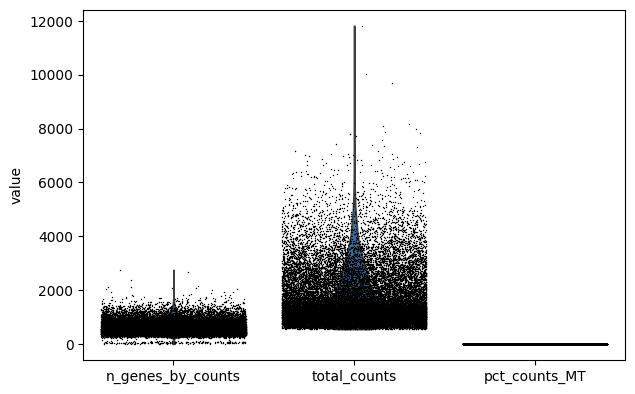

In [16]:
sc.pl.violin(ifn_data, ["n_genes_by_counts", "total_counts", "pct_counts_MT"], jitter = 0.4, multi_panel = False)

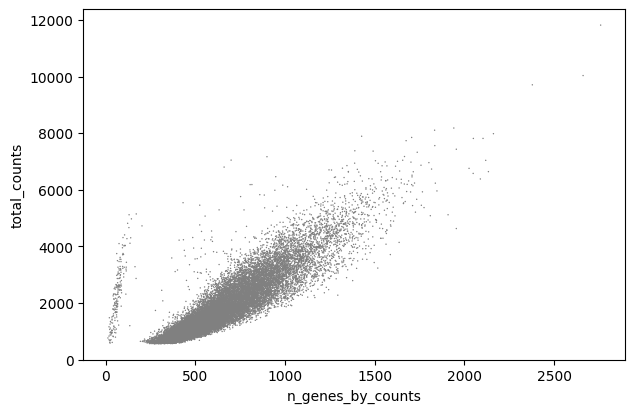

In [17]:
sc.pl.scatter(ifn_data, "n_genes_by_counts", "total_counts")

normalisation

In [18]:
ifn_data.layers["counts"] = ifn_data.X.copy()

In [19]:
sc.pp.normalize_total(ifn_data)
sc.pp.log1p(ifn_data)

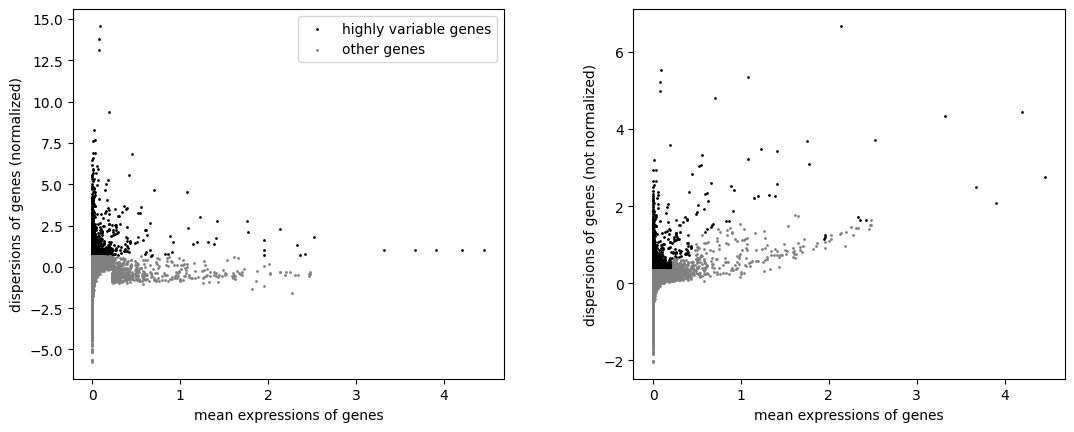

In [20]:
sc.pp.highly_variable_genes(ifn_data, n_top_genes= 2500)
sc.pl.highly_variable_genes(ifn_data)

dimensionality reduction

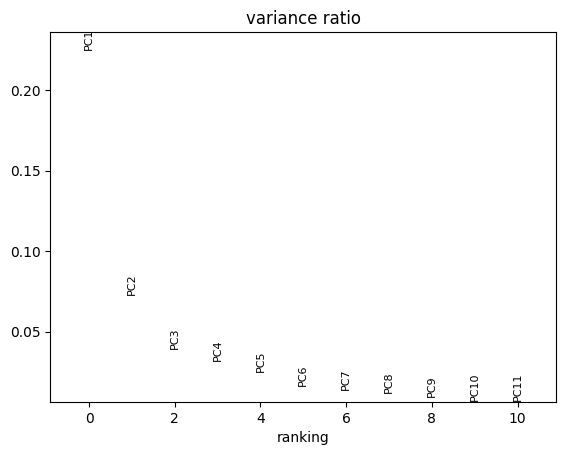

In [21]:
sc.tl.pca(ifn_data)
sc.pl.pca_variance_ratio(ifn_data, log = False, n_pcs= 10)

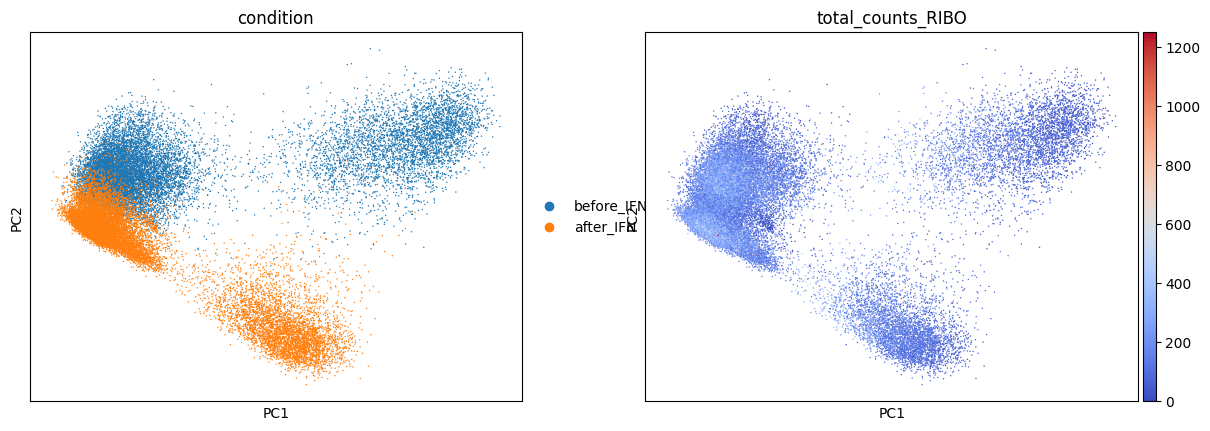

In [22]:
sc.pl.pca(ifn_data, color = ["condition", "total_counts_RIBO"], cmap= "coolwarm")

In [23]:
sc.pp.neighbors(ifn_data)

In [24]:
sc.tl.umap(ifn_data, min_dist= 0.5)

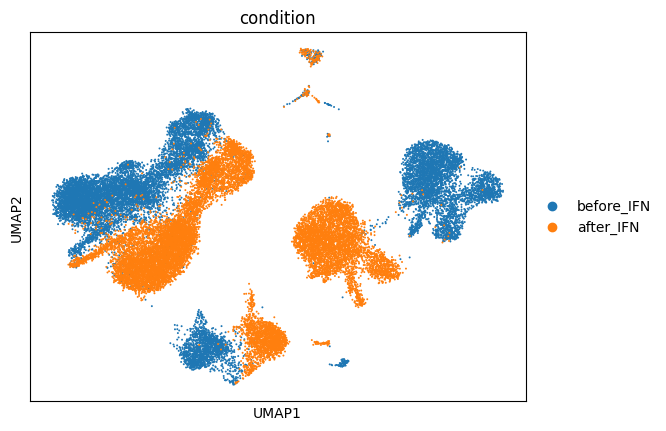

In [25]:
sc.pl.umap(ifn_data, color = ["condition"], size = 8)

In [26]:
sc.tl.leiden(ifn_data, key_added = "leiden0_5", resolution = 0.5)
sc.tl.leiden(ifn_data, key_added = "leiden1", resolution = 1)
sc.tl.leiden(ifn_data, key_added = "leiden0_25", resolution = 0.25)



/tmp/ipython-input-3345012011.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(ifn_data, key_added = "leiden0_5", resolution = 0.5)


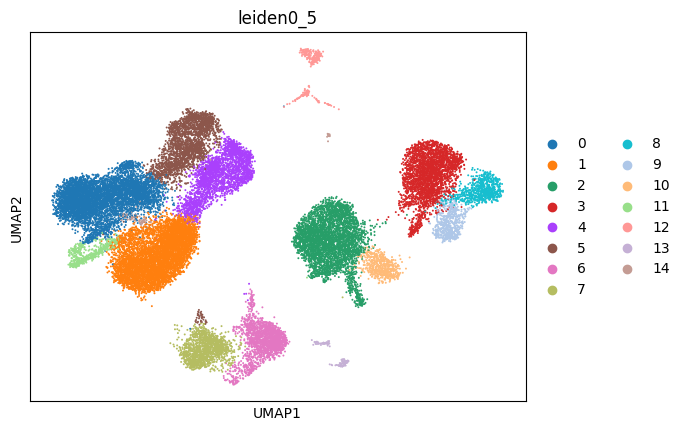

In [27]:
sc.pl.umap(ifn_data, color = ["leiden0_5"], size = 8)

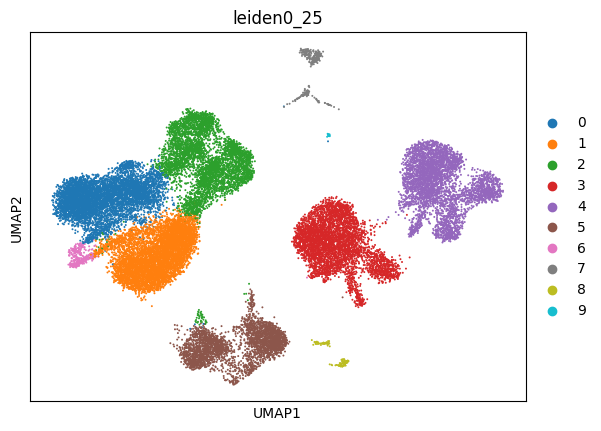

In [28]:
sc.pl.umap(ifn_data, color = ["leiden0_25"], size = 8)

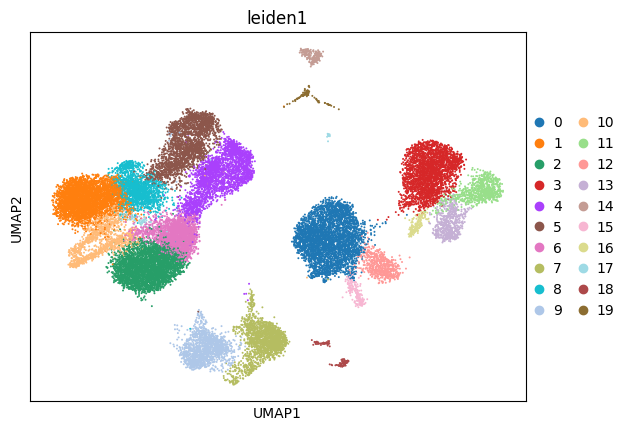

In [ ]:
sc.pl.umap(ifn_data, color = ["leiden1"], size = 8)

Cell annotations

In [29]:
!pip install decoupler


In [30]:
import decoupler as dc

In [31]:
markers = dc.op.resource(name= "PanglaoDB", organism= "human")
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]
markers = markers.rename(columns={"cell_type" : "source", "genesymbol" : "target"})
markers = markers[["source", "target"]]
markers.head()

,source,target
,,
0,Hepatocytes,A1CF
1,Germ cells,A2APA5
2,Bergmann glia,A2M
3,Mast cells,A3FIN4
4,Mast cells,A4GALT


In [32]:
dc.mt.ulm(ifn_data, net = markers, tmin = 3)

In [33]:
score = dc.pp.get_obsm(ifn_data, key = "score_ulm")
score

AnnData object with n_obs × n_vars = 29065 × 168
    obs: 'condition', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB', 'log1p_total_counts_HB', 'pct_counts_HB', 'leiden0_5', 'leiden1', 'leiden0_25'
    uns: 'log1p', 'hvg', 'pca', 'condition_colors', 'neighbors', 'umap', 'leiden0_5', 'leiden1', 'leiden0_25', 'leiden0_5_colors', 'leiden0_25_colors'
    obsm: 'X_pca', 'X_umap', 'score_ulm', 'padj_ulm'

In [34]:
ifn_data.obsm["score_ulm"].head()

,Acinar cells,Adipocyte progenitor cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Airway smooth muscle cells,Alpha cells,Alveolar macrophages,Anterior pituitary gland cells,Astrocytes,...,Taste receptor cells,Thymocytes,Transient cells,Trichocytes,Trigeminal neurons,Trophoblast cells,Tuft cells,Undefined placental cells,Urothelial cells,Vascular smooth muscle cells
AAACATACCAAGCT-1-before_IFN,0.142860,-0.558162,0.762376,-0.360223,-0.602917,-0.279013,1.944743,-0.755960,-0.644580,0.552303,...,-0.558162,2.639077,-0.720741,-0.279013,-0.247125,0.182421,1.827712,-0.455688,-0.455688,-0.322185
AAACATACCCCTAC-1-before_IFN,-0.831863,-0.628675,0.139486,-0.405730,-0.679083,-0.314260,0.044992,-0.193837,0.535935,-0.374095,...,-0.628675,1.696514,-0.811793,-0.314260,-0.529678,-0.122109,3.873104,1.781547,-0.513254,-0.362886
AAACATACCCGTAA-1-before_IFN,-0.710901,-0.537260,0.548700,-0.346734,-0.580338,-0.268564,1.211742,-0.727650,-0.620441,0.142317,...,-0.537260,2.025802,-0.693750,-0.268564,-0.904883,-0.693750,-0.727650,-0.438623,-0.438623,-0.310120
AAACATACCCTCGT-1-before_IFN,-0.814753,-0.615744,-0.888568,-0.397385,1.187802,-0.307796,-0.711077,-0.833949,-0.711077,0.598571,...,-0.615744,-0.019850,-0.019850,-0.307796,-1.037075,-0.795096,1.857751,-0.502698,-0.502698,-0.355422
AAACATACGAGGTG-1-before_IFN,-0.692764,-0.523552,-0.555640,-0.337888,-0.565532,-0.261712,-0.604612,-0.709085,-0.604612,2.042808,...,-0.523552,5.366514,-0.676050,-0.261712,-0.881796,-0.676050,0.115560,-0.427432,-0.427432,-0.302208


In [ ]:
ifn_data.obsm["score_ulm"].columns

Index(['Acinar cells', 'Adipocyte progenitor cells', 'Adipocytes',
       'Adrenergic neurons', 'Airway goblet cells',
       'Airway smooth muscle cells', 'Alpha cells', 'Alveolar macrophages',
       'Anterior pituitary gland cells', 'Astrocytes',
       ...
       'Taste receptor cells', 'Thymocytes', 'Transient cells', 'Trichocytes',
       'Trigeminal neurons', 'Trophoblast cells', 'Tuft cells',
       'Undefined placental cells', 'Urothelial cells',
       'Vascular smooth muscle cells'],
      dtype='object', length=168)

In [35]:
ifn_gene_rank = dc.tl.rankby_group(score, groupby= "leiden0_5", reference= "rest", method= "t-test_overestim_var")
ifn_gene_rank = ifn_gene_rank[ifn_gene_rank["stat"]>0]
ifn_gene_rank.head()

,group,reference,name,stat,meanchange,pval,padj
0,5,rest,NK cells,81.940139,7.429016,0.0,0.0
1,5,rest,Gamma delta T cells,79.202494,8.848272,0.0,0.0
2,5,rest,T cytotoxic cells,56.109413,3.731653,0.0,0.0
3,5,rest,Natural killer T cells,55.123983,2.948167,0.0,0.0
4,5,rest,T cells,53.015947,3.611065,0.0,0.0


In [36]:
top_names = ifn_gene_rank.groupby("group")["name"].apply(lambda x : x.head(1))
top_names

/tmp/ipython-input-1014163562.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_names = ifn_gene_rank.groupby("group")["name"].apply(lambda x : x.head(1))


,,name
group,,
0,336,T cells naive
1,1680,T memory cells
10,2352,Dendritic cells
11,1176,Melanocytes
12,1008,Erythroid-like and erythroid precursor cells
13,168,Plasmacytoid dendritic cells
14,2016,Pulmonary alveolar type II cells
2,1848,Microfold cells
3,672,Monocytes


In [37]:
n_ctypes = 1
n_ctypes = ifn_gene_rank.groupby("group").head(n_ctypes).groupby("group")["name"].apply(lambda x : x.head(n_ctypes))
n_ctypes

/tmp/ipython-input-367866297.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  n_ctypes = ifn_gene_rank.groupby("group").head(n_ctypes).groupby("group")["name"].apply(lambda x : x.head(n_ctypes))


,,name
group,,
0,336,T cells naive
1,1680,T memory cells
10,2352,Dendritic cells
11,1176,Melanocytes
12,1008,Erythroid-like and erythroid precursor cells
13,168,Plasmacytoid dendritic cells
14,2016,Pulmonary alveolar type II cells
2,1848,Microfold cells
3,672,Monocytes


In [38]:
dict_ann = ifn_gene_rank[ifn_gene_rank["stat"]>0].groupby("group").head(1).set_index("group")["name"].to_dict()
dict_ann

/tmp/ipython-input-4096037995.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dict_ann = ifn_gene_rank[ifn_gene_rank["stat"]>0].groupby("group").head(1).set_index("group")["name"].to_dict()


{'5': 'NK cells',
 '13': 'Plasmacytoid dendritic cells',
 '0': 'T cells naive',
 '7': 'B cells',
 '3': 'Monocytes',
 '8': 'Monocytes',
 '12': 'Erythroid-like and erythroid precursor cells',
 '11': 'Melanocytes',
 '9': 'Monocytes',
 '4': 'NK cells',
 '1': 'T memory cells',
 '2': 'Microfold cells',
 '14': 'Pulmonary alveolar type II cells',
 '6': 'B cells naive',
 '10': 'Dendritic cells'}

In [39]:
dict_ann_unique = {k: v + '_'+ str(k) for k,v in dict_ann.items()}
dict_ann_unique

{'5': 'NK cells_5',
 '13': 'Plasmacytoid dendritic cells_13',
 '0': 'T cells naive_0',
 '7': 'B cells_7',
 '3': 'Monocytes_3',
 '8': 'Monocytes_8',
 '12': 'Erythroid-like and erythroid precursor cells_12',
 '11': 'Melanocytes_11',
 '9': 'Monocytes_9',
 '4': 'NK cells_4',
 '1': 'T memory cells_1',
 '2': 'Microfold cells_2',
 '14': 'Pulmonary alveolar type II cells_14',
 '6': 'B cells naive_6',
 '10': 'Dendritic cells_10'}

In [40]:
ifn_data.obs["leiden0_5"] = ifn_data.obs["leiden0_5"].cat.rename_categories(dict_ann_unique)

In [41]:
ifn_data.obs["leiden0_5"]

,leiden0_5
AAACATACCAAGCT-1-before_IFN,NK cells_5
AAACATACCCCTAC-1-before_IFN,Plasmacytoid dendritic cells_13
AAACATACCCGTAA-1-before_IFN,T cells naive_0
AAACATACCCTCGT-1-before_IFN,B cells_7
AAACATACGAGGTG-1-before_IFN,T cells naive_0
...,...
TTTGCATGCTTCGC-1-after_IFN,B cells naive_6
TTTGCATGGCAGTT-1-after_IFN,Microfold cells_2
TTTGCATGGGAACG-1-after_IFN,NK cells_4
TTTGCATGGTCCTC-1-after_IFN,B cells naive_6


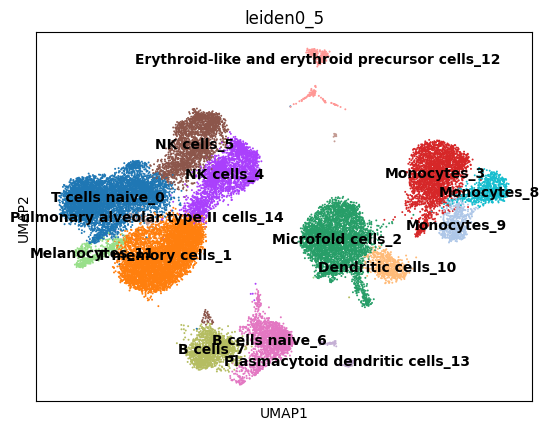

In [42]:
sc.pl.umap(ifn_data, color = ["leiden0_5"], size = 8, legend_loc= "on data")

perturbation analysis

In [43]:
ifn_data.layers.keys()

KeysView(Layers with keys: counts)

In [44]:
raw_counts = ifn_data.layers["counts"]

In [45]:
raw_counts

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 17570845 stored elements and shape (29065, 35635)>

In [46]:
ifn_data.X = raw_counts

In [47]:
ifn_data.obs_keys()

/tmp/ipython-input-1234393531.py:1: FutureWarning: Use obs (e.g. `k in adata.obs` or `str(adata.obs.columns.tolist())`) instead of AnnData.obs_keys, AnnData.obs_keys is deprecated and will be removed in the future.
  ifn_data.obs_keys()


['condition',
 'n_genes_by_counts',
 'log1p_n_genes_by_counts',
 'total_counts',
 'log1p_total_counts',
 'pct_counts_in_top_50_genes',
 'pct_counts_in_top_100_genes',
 'pct_counts_in_top_200_genes',
 'pct_counts_in_top_500_genes',
 'total_counts_MT',
 'log1p_total_counts_MT',
 'pct_counts_MT',
 'total_counts_RIBO',
 'log1p_total_counts_RIBO',
 'pct_counts_RIBO',
 'total_counts_HB',
 'log1p_total_counts_HB',
 'pct_counts_HB',
 'leiden0_5',
 'leiden1',
 'leiden0_25']

In [48]:
ifn_data.obs["condition"]

,condition
AAACATACCAAGCT-1-before_IFN,before_IFN
AAACATACCCCTAC-1-before_IFN,before_IFN
AAACATACCCGTAA-1-before_IFN,before_IFN
AAACATACCCTCGT-1-before_IFN,before_IFN
AAACATACGAGGTG-1-before_IFN,before_IFN
...,...
TTTGCATGCTTCGC-1-after_IFN,after_IFN
TTTGCATGGCAGTT-1-after_IFN,after_IFN
TTTGCATGGGAACG-1-after_IFN,after_IFN
TTTGCATGGTCCTC-1-after_IFN,after_IFN


In [50]:
ifn_data.obs.leiden0_5.value_counts()

,count
leiden0_5,
T cells naive_0,5707
T memory cells_1,5677
Microfold cells_2,3870
Monocytes_3,2788
NK cells_4,2546
NK cells_5,2299
B cells naive_6,1705
B cells_7,1479
Monocytes_8,784


In [52]:
ag_rfc = pt.tl.Augur("random_forest_classifier")

In [53]:
load_data = ag_rfc.load(ifn_data, label_col = "condition", cell_type_col = "leiden0_5")
load_data

AnnData object with n_obs × n_vars = 29065 × 35635
    obs: 'label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'total_counts_RIBO', 'log1p_total_counts_RIBO', 'pct_counts_RIBO', 'total_counts_HB', 'log1p_total_counts_HB', 'pct_counts_HB', 'cell_type', 'leiden1', 'leiden0_25', 'y_'
    var: 'MT', 'RIBO', 'HB', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    layers: 'counts'

In [54]:
v_data, v_results = ag_rfc.predict(load_data, subsample_size = 50, n_threads =4, select_variance_features = True, span = 1)
v_results["summary_metrics"]

! Set smaller span value in the case of a `segmentation fault` error.
! Set larger span in case of svddc or other near singularities error.


Output()

! Skipping Plasmacytoid dendritic cells_13 cell type - the number of samples for at least one class type is less than subsample size 50.
! Skipping B cells_7 cell type - the number of samples for at least one class type is less than subsample size 50.
! Skipping Monocytes_3 cell type - the number of samples for at least one class type is less than subsample size 50.
! Skipping Monocytes_8 cell type - the number of samples for at least one class type is less than subsample size 50.
! Skipping Monocytes_9 cell type - the number of samples for at least one class type is less than subsample size 50.
! Skipping Microfold cells_2 cell type - the number of samples for at least one class type is less than subsample size 50.
! Skipping Pulmonary alveolar type II cells_14 cell type - the number of samples for at least one class type is less than subsample size 50.
! Skipping Dendritic cells_10 cell type - the number of samples for at least one class type is less than subsample size 50.


,NK cells_5,T cells naive_0,Erythroid-like and erythroid precursor cells_12,Melanocytes_11,NK cells_4,T memory cells_1,B cells naive_6
mean_augur_score,0.717703,0.754136,0.531932,0.621236,0.582429,0.618138,0.836096
mean_auc,0.717703,0.754136,0.531932,0.621236,0.582429,0.618138,0.836096
mean_accuracy,0.653274,0.674646,0.526720,0.585948,0.539792,0.571895,0.745550
mean_precision,0.699287,0.711501,0.532102,0.585525,0.535290,0.565529,0.839038
mean_f1,0.611059,0.646653,0.482743,0.595744,0.571918,0.613054,0.698049
mean_recall,0.567549,0.615466,0.476250,0.634755,0.636961,0.688284,0.617206


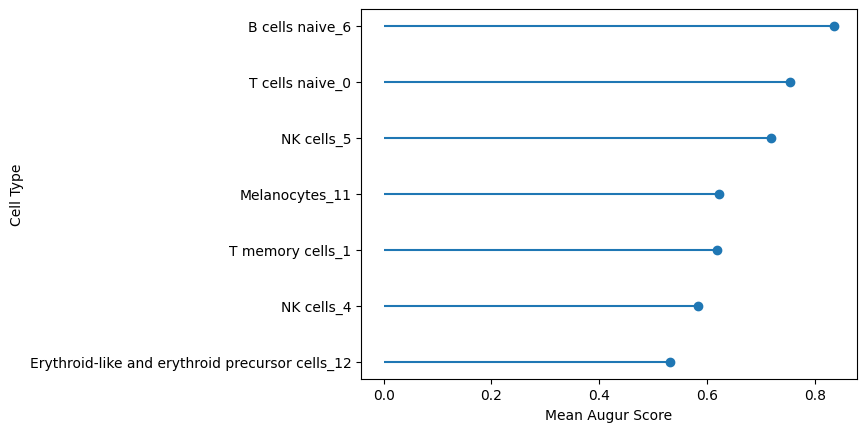

In [56]:
lollipop = ag_rfc.plot_lollipop(v_results)

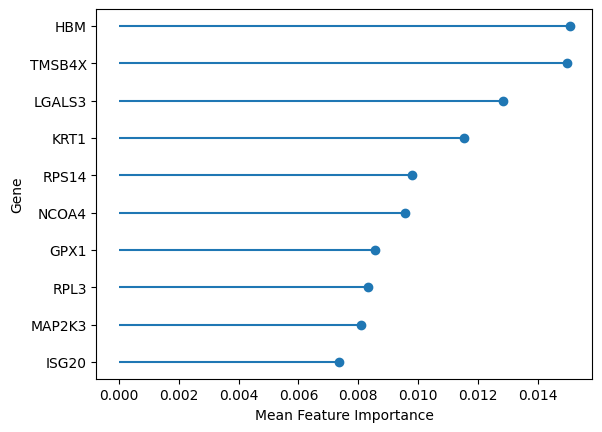

In [58]:
imp_features = ag_rfc.plot_important_features(v_results)